In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # supress warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode



In [3]:
import gzip

with gzip.open('var0_lc.tgz') as f:

    Var0 = pd.read_csv(f, comment="#",  engine='c', skip_blank_lines=True)

Var0 = Var0.dropna()


Var0.to_csv("Variables_0")

Var0

,./
0,2203.60391 10.805 0.042 37070
1,2204.58841 10.825 0.024 37190
2,2206.59377 10.836 0.039 37468
3,2207.57680 10.916 0.045 37633
4,2211.55696 10.855 0.038 37817
...,...
1096514,1871.60719 13.608 0.012 507
1096515,1873.57974 13.718 0.014 818
1096516,1875.57412 13.694 0.014 1138
1096517,1877.57500 13.755 0.010 1460


In [6]:


import gzip

with gzip.open('var0.gz') as f:

    Var0_context = pd.read_csv(f, comment="#")

Var0_context

,000030-3937.5 00:00:30 -39:37:30 2.5545 1870.98 10.79 1.22 ED SW~Phe Al*
0,000053-1717.5 00:00:53 -17:17:30 0.297986 1869...
1,000108-3330.1 00:01:08 -33:30:06 0.46658 1869....
2,000116-6037.0 00:01:16 -60:37:00 0.122072 1868...
3,000118-3551.7 00:01:18 -35:51:42 25.67 1916.3 ...
4,000119-3505.9 00:01:19 -35:05:54 37.3 1970.0 1...
...,...
3120,235905-5634.6 23:59:05 -56:34:36 244 2528.3 7....
3121,235930-8636.3 23:59:30 -86:36:18 14.96 1915.8 ...
3122,235935-2952.0 23:59:35 -29:52:00 218 3194.0 10...
3123,235951-3343.5 23:59:51 -33:43:30 0.167164 1868...


In [2]:
pip install astroML

Note: you may need to restart the kernel to use updated packages.


In [3]:
from astroML.datasets import fetch_rrlyrae_templates

from scipy.signal import fftconvolve

from scipy import fftpack
from matplotlib import mlab

from astroML.datasets import fetch_LIGO_large

from scipy.fftpack import fft
from scipy.stats import norm

from astroML.fourier import PSD_continuous

In [4]:
templates = fetch_rrlyrae_templates()
x, y = templates['115r'].T

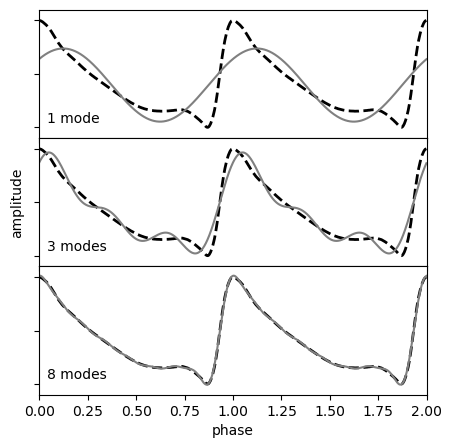

In [7]:
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0)

kvals = [1, 3, 8]
subplots = [311, 312, 313]

for (k, subplot) in zip(kvals, subplots):
    ax = fig.add_subplot(subplot)

    # Use FFT to fit a truncated Fourier series
    y_fft = np.fft.fft(y)
    y_fft[k + 1:-k] = 0
    y_fit = np.fft.ifft(y_fft).real

    # plot the true value and the k-term reconstruction
    ax.plot(np.concatenate([x, 1 + x]),
            np.concatenate([y, y]), '--k', lw=2)
    ax.plot(np.concatenate([x, 1 + x]),
            np.concatenate([y_fit, y_fit]), color='gray')

    label = "%i mode" % k
    if k > 1:
        label += 's'

    ax.text(0.02, 0.1, label, ha='left', va='bottom',
            transform=ax.transAxes)

    if subplot == subplots[-1]:
        ax.set_xlabel('phase')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    if subplot == subplots[1]:
        ax.set_ylabel('amplitude')
    ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlim(0, 2)
    ax.set_ylim(1.1, -0.1)

plt.show()

## Componentes de una serie de tiempo

----
Podemos encontrar en una serie de tiempo cuatro componentes:

Tendencia (Trend): es el componente permanente, el efecto persistente en el tiempo.

Estacionalidad (Seasonality): es un patrón estacional que se repite con regularidad.

Componente aleatoria (Residual - Remainder): son shocks que no presentan un efecto duradero. Se los define también como ruido o movimientos random.

Ciclos (Cycle): otro tipo de dinámica no capturada por la tendencia o estacionalidad.